# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
16 de novembro de 2022

# Aluno:

# Orientações Gerais

*   Esta avaliação é **individual** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO-NoUSP-TURMA.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 19/11** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOA PROVA!**

In [1]:
#Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

1. Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados;
2. Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.
3. Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?
4. Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

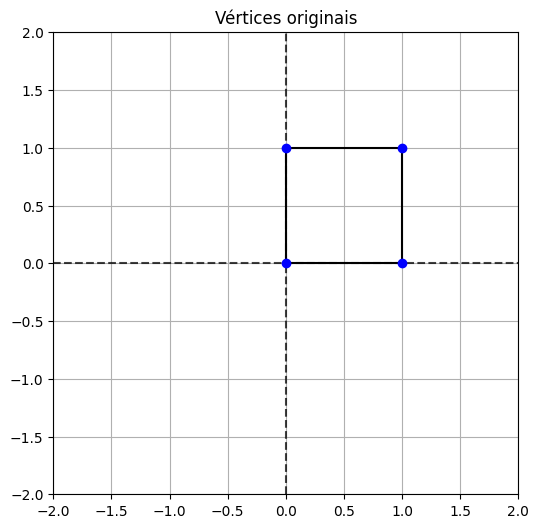

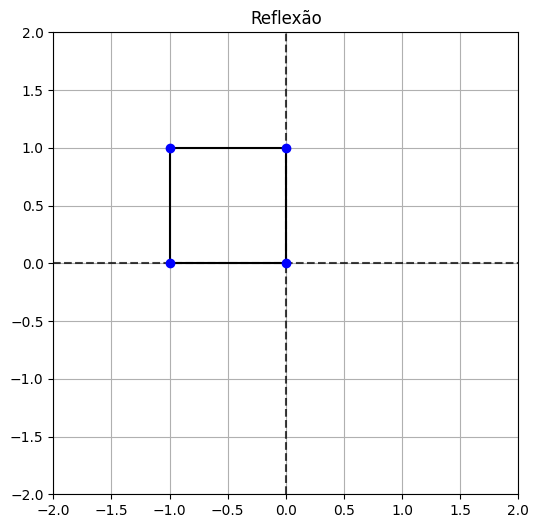

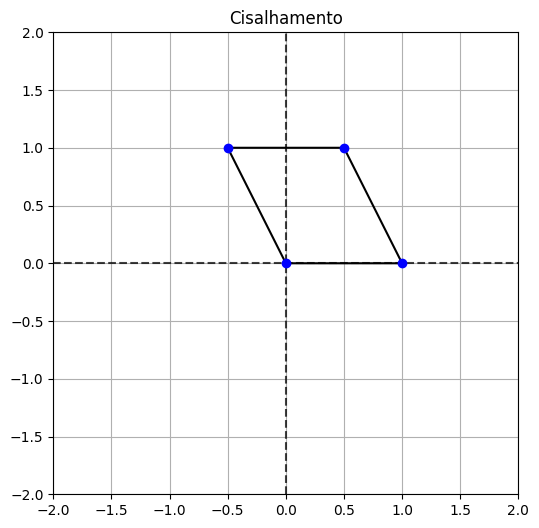

In [6]:
# Solução 1
# Vértices do quadrado

Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)

"""
  Dada reflexão: (-x,y) = x(-1,0) + y(0,1)
  T = [[-1,0],[0,1]] (transposta)
"""
T1 = np.array([[-1,0],[0,1]]).T


k = -0.5
# Cisalhamento horizontal
T2 = np.array([[1,0], [k,1]]).T

# Aplicando as transformações
T1Q = T1 @ Q
T2Q = T2 @ Q

def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plots
plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

Observando posições finais:
[[-1.   0.5]
 [ 0.   1. ]]
Aplicando T2, depois T1:
[[-1.   0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento vertical')

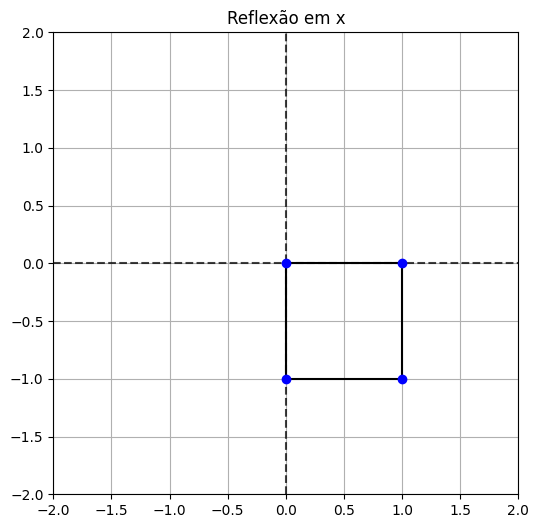

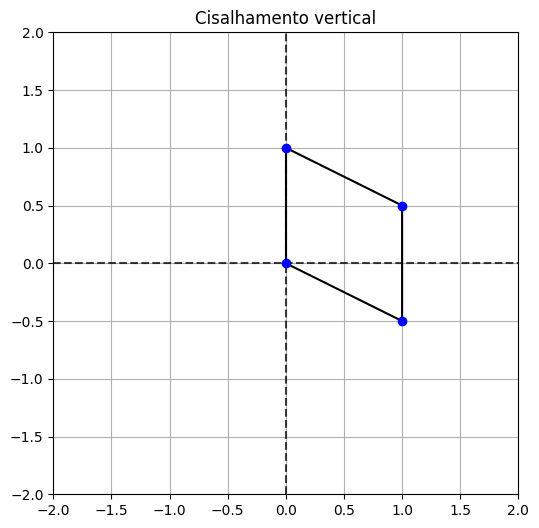

In [15]:
#Solução 2)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)

"""
  Como as operações de T3 estão sendo feitas sobre a base canônica [(1,0),(0,1)]
  T3 = [[-1,0],[0.5,1]] (transposta)

  Como k = -0.5
  T3 = [[-1,0],[-k,1]] (transposta)
"""
print("Observando posições finais:")
T3 = np.array([[-1,0],[-k,1]]).T
print(T3)

# Solução 3)
# Por outro lado, aplicando T2, depois T1
print("Aplicando T2, depois T1:")
T21 = (T1 @ T2)
print(T21)

# Solução 4)
# Reflexão em torno do eixo x

"""
  Em analogia à reflexão em torno do eixo y, temos que:
  Em torno de oy: (x,y) -> (-x,y) = x(-1,0) + y(0,1) 
    - Ou seja, x -> -x, y -> y

  Em torno de ox, x -> x, y -> -y, e portanto
    (x,y) -> (x,-y) = x(1,0) + y(0,-1), ou também

    T = [[1,0],[0,-1]] (transposta)
"""
T4 = np.array([[1,0],[0,-1]]).T

# Cisalhamento vertical
"""
  Tal como o item anterior, para o cisalhamento horizontal temos:
  T = [[1,0], [k,1]] (transposta)
    - Ou seja,  (1,0) -> (1,0)
                (0,1) -> (k,1)
  
    - Ou, de outra forma:
      (x,y) -> (x+ky,y) = x(1,0) + y(k,1)

  Assim, o cisalhamento vertical é escrito com o mapeamento
    (1,0) -> (1,k)
    (0,1) -> (0,1)

  - Ou seja
    (x,y) -> (x,xk+y) = x(1,k) + y(0,1)

  T = [[1,k], [0,1]]


"""

T5 = np.array([[1,k], [0,1]]).T

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em x')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')

# **Exercício 2** 
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo. 
 
b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

Sendo T a matriz de transformação dada no enunciado, é válido que

$$
B = \underbrace{
\begin{bmatrix}
| &  & |\\
\mathbf{u}_1  & \cdots & \mathbf{u}_n\\
| &  & |
\end{bmatrix}}_{A}
$$

A dimensão da imagem é igual a dimensão dos vetores $u_1, ..., u_n$ de modo que

$$
T(e_1) = (3,2,0) \\
T(e_2) = (9,0,0) \\
... \\
T(e_7) = (1,3,2) \\
$$

In [187]:
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])

# Questão a
"""
  Com base no que mencionamos acima, vale que
  dim(Im(B)) = 3

  Também, pelo teorema do núcleo-imagem, sabemos que
    - dim(Im) + dim(Ker) = dim(V)

  Nesse caso, sendo dim(Im(B)) = 3 e dim(V) = 7, vale que dim(Ker(B)) = 7 - 3 = 4
"""
dimImagem = B.shape[0]
dimKer = B.shape[1] - dimImagem
print(f"Dimensão Imagem [dim(Im)]: {dimImagem}")
print(f"Dimensão Núcleo [dim(Ker)]: {dimKer}")

Dimensão Imagem [dim(Im)]: 3
Dimensão Núcleo [dim(Ker)]: 4


Para o espaço da imagem podemos escolher a base canônica do $\mathbf{R}^7$ tais que sejam responsável por levar ao vetor nulo de $\mathbf{R}^3$.

Assim, podemos tomar para o núcleo

$$
T(e_1) = (0,0,0)\\
T(e_2) = (0,0,0)\\
T(e_3) = (0,0,0)\\
T(e_4) = (0,0,0)\\
$$

E, para as 3 componentes restantes à imagem, temos

$$
T(e_5) = (9,0,1)\\
T(e_6) = (3,5,0)\\
T(e_7) = (1,3,2)\\
$$

Resolvendo o sistema

$$
\left[
\begin{array}{cccc}
3 & 9 & 6 & 6 \\
2 & 0 & 9 & 2 \\
0 & 0 & 1 & 0 \\
\end{array}
\right] 
\left[
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{array}
\right] = 
\left[
\begin{array}{c}
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]
$$

A base para o espaço do núcleo é dada por

$$
Ker\{ 
  [1,0,0,0,0,0,0]^T,  
  [0,-1/3,0,0,0,0,0]^T, 
  [0,0,0,0,0,0,0]^T, 
  [0,0,0,0,0,0,-1]^T\}
$$

In [196]:
u1 = np.array([[9,0,1]]).T
u2 = np.array([[3,5,0]]).T
u3 = np.array([[1,3,2]]).T

e1 = np.array([[0,0,1,0,0,0,0]]).T
e2 = np.array([[0,0,0,1,0,0,0]]).T
e3 = np.array([[0,0,0,0,1,0,0]]).T

# Geradores do espaço nulo
v1 = np.array([[1,0,0,0,0,0,0]]).T
v2 = np.array([[0,-1/3,0,0,0,0,0]]).T
v3 = np.array([[0,0,0,0,0,0,0]]).T
v4 = np.array([[0,0,0,0,0,0,-1]]).T

M = np.hstack((e1, e2, e3, v1, v2, v3, v4))

N = np.zeros((3,7))
N[:,0] = u1[:,0]
N[:,1] = u2[:,0]
N[:,2] = u3[:,0]

print(M)

# Matriz da transformação linear A
A = N @ np.linalg.inv(M)

print('Matriz da transformação linear A:')
print(A)
print('')

# Verificando vetor no núcleo
v = np.random.rand(1) * v1 + np.random.rand(1) * v2
print('Imagem de um vetor qualquer gerado por v1 e v2:')
print(A @ v)

[[ 0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.         -0.33333333  0.
   0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -1.        ]]


LinAlgError: Singular matrix

# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo. 

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [150]:
V = np.random.randint(0,20,size=(20,10))
print(V)

[[ 0 10 16  6 10 14  8  8  7  8]
 [ 9 19 11 16 10 19  5  3  7 14]
 [12 17 11  6 16 11  7  0  6  8]
 [ 6 17 17  2  1 17 18 18 14  9]
 [19 12 10 15  8  3  0 12  2  8]
 [11  8  9  4  4  4 17  5  6 13]
 [ 7 13  5  3 16  9 11 17  5  0]
 [16 14 10 16 14  7 12 10 17  4]
 [18  3 12 10  3  4  5 14  3 11]
 [11  2  6 11  3  5  8 17  9  8]
 [ 2 16 11 17 18  3 16  0  5 13]
 [16 17 14  1  5 13  1 13  7 10]
 [ 5  1 18 15  4  7 14 17  3 15]
 [ 9 15 14 18 11  2  4  0 16  3]
 [10 11 14 13  8 11  5 16 15  9]
 [12  0  5 19 13 18 14  0 11 13]
 [19  2  3 17  1  9  8 17 13  7]
 [ 2  3 16 17 15  2 16  9  9 14]
 [13 18 18  0 19 14  3 14 19 14]
 [ 4 17  7 19 15  1  9 12 19  8]]


Primeiro, vamos considerar a matriz A com ortonormalização Q final dada por

$$
A = 
\left[
  \begin{array}{cc}
  4 & -2 \\
  3 & 1
  \end{array}
\right] 
\quad
Q = \frac{1}{5}
\left[
  \begin{array}{cc}
  4 & -3 \\
  3 & 4
  \end{array}
\right]
$$

Sendo 

$$
a_1 = \left[\begin{array}{c}4\\3\end{array}\right], a_2 = \left[\begin{array}{c}-2\\1\end{array}\right]
$$

vetores iniciais, não ortogonais, e 

$$
q_1 = \frac{1}{5}\left[\begin{array}{c}4\\3\end{array}\right], q_2 = \frac{1}{5}\left[\begin{array}{c}-3\\4\end{array}\right]
$$

vetores ortonormais.

Para encontrar $q_1$ e $q_2$ temos os seguintes passos:

$$
q_1 = a_1 = \frac{1}{\langle a_1, a_1 \rangle}\left[\begin{array}{c}4\\3\end{array}\right]
$$

$$
q_2 = a_2 - proj_{q_1} a_2 = \left[\begin{array}{c}-2\\1\end{array}\right] - \frac{\langle q_1, a_2 \rangle}{\langle q_1, q_1 \rangle} q_1
$$


Entendendo o passo a passo para o calculo da ortonormalização da matriz A acima

In [134]:
X = np.array([[4,3], [-2,1]]).T
q1 = X[:,0] / np.linalg.norm(X[:,0]) # q1 = (0.8, 0.6) (transposta)
qj = q1 / np.linalg.norm(q1)
q2 = X[:,1] - np.dot(X[:,1], qj) * qj
q2 = q2 / np.linalg.norm(q2) # q2 = (0.6, 0.8) (transposta)
print(q1, q2)

[0.8 0.6] [-0.6  0.8]


In [156]:
# a) Ortonormalização de uma base qualquer dada e teste do código em V

def gram_schmidt(x):
  V = x.copy()
  Q = np.zeros(x.shape)
  for j in range(x.shape[1]):
    qj = V[:,j] / np.linalg.norm(V[:,j])
    for k in range(j+1, x.shape[1]):
      V[:,k] = V[:,k] - np.dot(V[:,k], qj) * qj
    Q[:,j] = qj
  return Q

Q = gram_schmidt(V)
# print(Q)
print(Q.shape[0], Q.shape[1])

# b) Teste que verifica se a base obtida é de fato ortonormal

"""
  Para uma matriz ortonormalizada Q, temos que Q^T @ Q = 1 (1: matriz identidade)
  Dessa forma, Caso Q^T @ Q - 1 = 0, verificamos que Q é ortonormal
"""
ident = Q.T @ Q
err = np.linalg.norm(np.eye(ident.shape[0], ident.shape[1]) - Q.T @ Q)

print(err)


20 10
0.7606593325680173


Como o erro (direfença entre $Q^T Q - 1$) é maior que zero, com erro $\approx 0.76$, é possível dizer que a matriz não está perfeitamente ortonormalizada.

Uma forma de analizar este resultado decorre do fato de que, para um processo de Gram-Schmidt de ortonormalização, supõe-se um espaço vetorial V (com produto interno) e um conjunto $A = \{v_1, ..., v_n\} \in V$ linearmente independente.

Como $V$ sobre o qual aplicamos o processo de Gram-schmidt é gerado aleatoriamente, sem que haja imposição de suas componentes serem LI, o processo de ortonormalização não ocorre precisamente caso tivessemos esta hipótese. 

Caso consideremos a matriz A abaixo, LI

$$
A = \left[
\begin{array}{ccc}
1 & 3 & 0 \\
0 & 2 & 1 \\
-4 & 0 & -5 \\
\end{array}
\right]
$$

In [158]:
A = np.array([[1,3,0], [0,2,1], [-4,0,-5]]).T
Q = gram_schmidt(A)
ident = Q.T @ Q
err = np.linalg.norm(np.eye(ident.shape[0], ident.shape[1]) - Q.T @ Q)
print(ident)
print(err)

[[1.00000000e+00 0.00000000e+00 8.68257211e-18]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [8.68257211e-18 0.00000000e+00 1.00000000e+00]]
1.1169926481765567e-16


A ortonormalização ocorre corretamente, com erro associado consideravelmente igual a 0.

# **Exercício 4**

O crescimento populacional do Brasil ao longo dos anos pode ser observado na tabela abaixo, de acordo com dados do Censo-IBGE: 


Ano | População (milhões)
--- | :---: 
1872 | 9,9
1890 | 14,3
1900 | 17,4
1920 | 30,6
1940 | 41,2
1950 | 51,9
1960 | 70,9
1970 | 94,5
1980 | 121,1
1991 | 146,9
2000 | 169,5
2010 | 190,7


Tabela: *População do Brasil, em milhões de pessoas, entre os anos de 1872-2010. Dados Censo-IBGE.*



O último Censo foi realizado em 2010 e, devido à pandemia da Covid-19, o de 2020 foi adiado. Por isso, não é possível saber, com maior precisão, a população atual do país. Com o objetivo de estimar a população do Brasil em 2022, ajuste, no sentido dos mínimos quadrados, uma reta e uma parábola aos dados representados na tabela.

a) Qual das duas aproximações você considera melhor para estimar a população atual do país ? Justifique a sua resposta calculando o erro da aproximação. Mostre, também, os gráficos das duas aproximações obtidas.

b) Qual seria a população estimada do Brasil em 2022 ? Justifique.

### Solução

Como utilizaremos a matriz de Vandermonde para aproximação polinomial dos mínimos quadrados, temos o seguinte:

Para um polinônimo de grau $n$, temos: 

$p(t) = a_0 + a_1 t + a_2 t^2 + ... + a_{n-1} t^{n-1}$

E para um conjunto de dados com $m$ dimensões ($m$ linhas em uma tabela, por exemplo), a matriz de Vandermonde associada é dada por

$$
\left[
\begin{array}{ccccc}
1 & t_1 & t_1 ^2 & ... & t_1 ^{n-1} \\
1 & t_2 & t_2 ^2 & ... & t_2 ^{n-1} \\
... &  &  & ... & ... \\
1 & t_m & t_m ^2 & ... & t_m ^{n-1} 
\end{array}
\right]
\left[
\begin{array}{c}
a_0 \\
a_1 \\
... \\
a_m 
\end{array}
\right] =
\left[
\begin{array}{c}
y_0 \\
y_1 \\
... \\
y_m 
\end{array}
\right]
$$

Representando como $Va = Y$ temos que

$$
Va = Y \\
V^T V a = V^T Y \\
a = [(V^T V)^{-1} V^T] Y
$$

Erro de aproximação (reta):  426.9709945006252
Estimativa para 2022: P_1(x=2022) = 177.50886751141297

Erro de aproximação (parábola):  20.775759492858523
Estimativa para 2022: P_2(x=2022) = 232.99750099851371


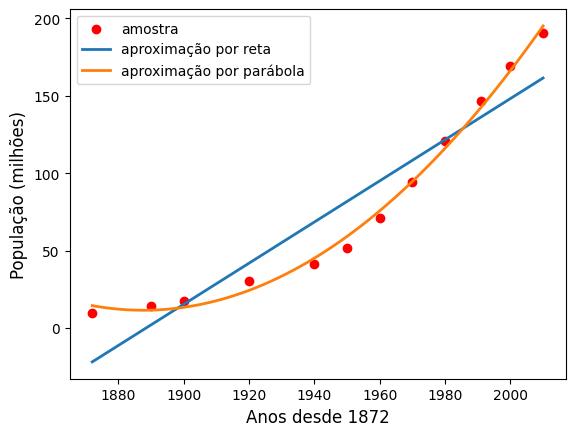

In [117]:
x = [1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010] 
y = [9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7]

# Resolvendo X^T.X a = X^T y (X matriz de Vandermond)
def min_squares(x, y, m):
  A = np.vander(x, m, increasing=True) 
  AtA = np.dot(A.T, A)
  Atb = np.dot(A.T, y)
  alpha = np.linalg.solve(AtA, Atb)
  return alpha

# Calculando o erro da aproximação
def min_squares_error(X, Y, p):
  y = p(np.array(X))
  
  erro = np.linalg.norm(y - Y)**2 / len(X)
  return erro

alfa_reta = min_squares(x, y, 2) # calcula o sistema com m=2 (reta)
p_reta = lambda x: alfa_reta[0] + alfa_reta[1]*x # Definindo P1(x) 
print("Erro de aproximação (reta): ", min_squares_error(x, y, p_reta)) # erro de aproximação
print(f'Estimativa para 2022: P_1(x=2022) = {p_reta(2022)}') # imprime P1(x)
print()

alfa_parabola = min_squares(x, y, 3) # calcula o sistema com m=3 (parabola)
p_parabola = lambda x: alfa_parabola[0] + alfa_parabola[1] * x + alfa_parabola[2] * x**2 # Definindo P2(x) 
print("Erro de aproximação (parábola): ", min_squares_error(x, y, p_parabola)) # erro de aproximação
print(f'Estimativa para 2022: P_2(x=2022) = {p_parabola(2022)}') # imprime P2(x)



x_dist = np.linspace(1872, 2010, num=100)

plt.scatter(x,y,label = 'amostra',linewidth = 1,color='red')
plt.plot(x_dist,p_reta(x_dist),label = 'aproximação por reta',linewidth = 2)
plt.plot(x_dist,p_parabola(x_dist),label = 'aproximação por parábola',linewidth = 2)
plt.xlabel('Anos desde 1872',fontsize='large')
plt.ylabel('População (milhões)',fontsize='large')
plt.legend()
plt.show()

Como pode ser analisado pelo gráfico, os pontos da amostra do Censo são mais coerentes à aproximação utilizando uma parábola.

De modo mais analítico, a maior coerência da aproximação via parábola ocorre quando comparamos os erros de aproximação pelo método dos mínimos quadrados. O erro associado à aproximação linear ($ \approx 426$) é de cerca de 20 vezes maior que o erro associado à aproximação com polinômio de grau 2 ($\approx 20$)

A estimativa para ambas as regressões está mostrada acima (em milhões de habitantes)